In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = '/Users/dana/Documents/Pew Research Reading Project'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all3years.pkl'))

In [5]:
# Check for missing values

df.isnull().sum()

id                      0
year                    0
language                0
state                   0
sex                     0
age                     0
marital                 0
education               0
employment              0
hispanic                0
race                    0
income                  0
party                   0
number_of_books_read    0
read_printed_books      0
read_audiobooks         0
read_e-books            0
income_estimate         0
reader_category         0
generation              0
reading_type            0
education_group         0
employed                0
dtype: int64

In [6]:
dups = df.duplicated()

In [7]:
dups.shape # No dups

(5006,)

/Users/dana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_books_read', ylabel='Density'>

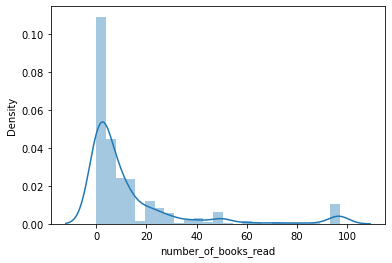

In [8]:
sns.distplot(df['number_of_books_read'], bins=25) # Shows extreme values

In [9]:
df['number_of_books_read'].mean() # Check the mean

13.50539352776668

In [10]:
df['number_of_books_read'].median() # Check the median

5.0

In [11]:
df['number_of_books_read'].max() # Check the max

97

In [12]:
# Hypothesis: The more educated a person is, the more they read.

In [13]:
# assign numbers to education groups
df = df.replace({'education_group': {'Unknown': 0, 'Less than high school': 1, 'High school graduate': 2,
                               'College < 4yr degree': 3, 'College 4yr degree': 4, 'College > 4yr degree': 5}})

In [14]:
df['education_group'].value_counts()

3    1303
4    1264
2    1111
5     915
1     348
0      65
Name: education_group, dtype: int64

In [15]:
df.shape

(5006, 23)

In [16]:
df = df.loc[df['number_of_books_read'] < 60]

In [17]:
df.shape

(4711, 23)

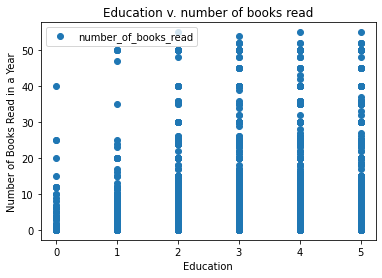

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'education_group', y='number_of_books_read',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Education v. number of books read')  
plt.xlabel('Education')  
plt.ylabel('Number of Books Read in a Year')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['education_group'].values.reshape(-1,1)
y = df['number_of_books_read'].values.reshape(-1,1)

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Create a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

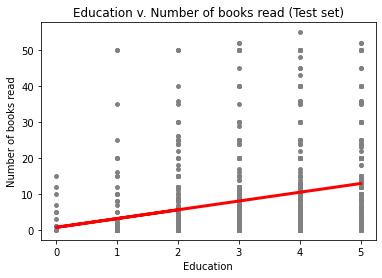

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Education v. Number of books read (Test set)')
plot_test.xlabel('Education')
plot_test.ylabel('Number of books read')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.44000591]]
Mean squared error:  131.34084344617239
R2 score:  0.08336547567716668


In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,12.914854
1,6,5.594837
2,15,10.474849
3,40,10.474849
4,2,8.034843
5,20,8.034843
6,0,5.594837
7,1,5.594837
8,0,5.594837
9,0,5.594837


In [28]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.44000591]]
Mean squared error:  116.84962873654159
R2 score:  0.07299839713570722


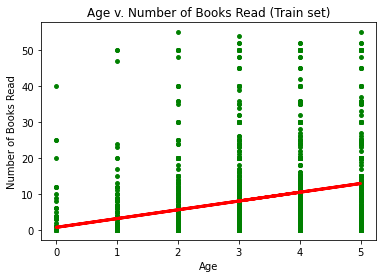

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age v. Number of Books Read (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Number of Books Read')
plot_test.show()